## Solución al TSP (problema problema del vendedor viajero) con el método de recocido simulado.
## Alondra Galván Patlán 


**Pseudocódigo Recocido Simulado**



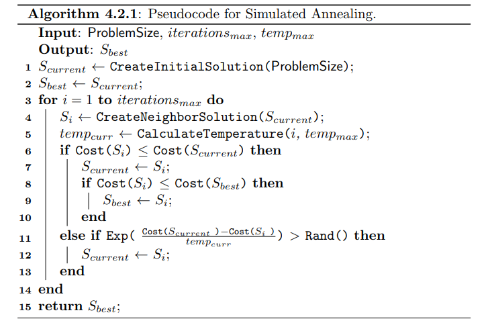

In [ ]:
from matplotlib import pyplot as plt
import math 
import random
import numpy as np
import itertools

# Funciones relacionadas a la modelación del TSP y visualización de resultados

In [ ]:
#Funciones pertinentes al TSP

class ciudad:
  def __init__(self, x, y, id):
    self.x = x  # coords
    self.y = y
    self.id = id # identificación oficial
    self.label = 'c_'+str(id) #label
    

#generador de (N) ciudades
def genera_ciudades(N):
  c = []
  for i in range(N):
    c.append( ciudad(random.uniform(0,100), random.uniform(0,100) , i) )
  return c

# regresa la distancia entre las ciudades c1 y c2
def d(c1,c2):
  return math.sqrt( (c1.x - c2.x)**2 + (c1.y - c2.y)**2 )

# regresa indice de c del elemento con id = j
def ret_id(j,c):
  n = len(c)
  for i in range(n):
    if c[i].id == j:
      return i

def permuta(o,c): #Recibe orden p/ej o = [0,2,3,5,1,4,7,6], c= arreglo de ciudades
  p = []
  for j in o:
    i = ret_id(j,c)
    p.append(c[i])
    c[i].id = j
  return p #regresa una permutación (arreglo de ciudades)

# recibe una permutación: un arreglo x con las ciudades permutadas
def CT(p):  # será nuestra función objetivo
  costo_tot = 0
  n = len(p)
  for j in range(n):
    costo_tot = costo_tot + d(p[j], p[(j+1)%n])
  return costo_tot #regresa el costo total de realizar el recorrido en p

#c = arreglo de ciudades
def grafica_ciudades(c):
  ids = []
  plt.figure(figsize=(11,7))
  for p in c:
    ids.append(p.id)
    plt.plot(p.x,p.y, marker="o", color = "mediumvioletred")
    plt.annotate(p.label, (p.x,p.y))

def grafica_recorrido(c, s):
  print('El costo total del recorrido es',CT(c),'\n')  
  plt.figure(figsize=(11,7))
  n = len(c)
  for j in range(n):
    plt.plot(c[s[j]].x,c[s[j]].y, marker="o", color = "crimson")
    plt.plot([c[s[j]].x, c[s[(j+1)%n]].x], [c[s[j]].y, c[s[(j+1)%n]].y ], linewidth=1, color = "black")
    plt.annotate(c[s[j]].id , (c[s[j]].x,c[s[j]].y))
    #plt.annotate(str(j) , (c[s[j]].x,c[s[j]].y))

def fuerza_bruta(c): #encuentra un recorrido óptimo cálculando y comparando el costo total de todos los n! recorridos posibles 
  n = len(c) 
  permutations = list(itertools.permutations(list(range(n))))
  print('n! = ', len(permutations))
  p = []  
  min = CT(permuta(permutations[0],c))
  pmin = 0 #indice
  for k in range(len(permutations)):
    d = CT(permuta(permutations[k],c))
    #print(permutations[k],'  ',d)
    if d < min:
      min = d
      pmin = k
  print('Solución por fuerza bruta:',permutations[pmin])
  return permutations[pmin]


#Implementación Recocido Simulado

In [ ]:
def transport(S, rand_pos, sg_0):
  if sg_0 > rand_pos:
    S.insert(rand_pos, S[sg_0])
    S.insert(rand_pos + 1, S[sg_0+2])
    S.pop(sg_0 + 2)
    S.pop(sg_0 + 2)
  else:
    S.insert(rand_pos, S[sg_0])
    S.insert(rand_pos + 1, S[sg_0+1])
    S.pop(sg_0)
    S.pop(sg_0)

def CreateNeighborSolution(S_current):
  S_new = S_current
  n = len(S_new)
  sg_0 = random.randint(0,n-2) #inicio segmento
  sg_1 = sg_0 + 1  #fin segmento
  if random.randint(0,1): #invertir/reverse
    temp = S_new[sg_0]
    S_new[sg_0] = S_new[sg_1]  #swap
    S_new[sg_1] = temp 
  else: # transportar/transport
    rand_pos = sg_0
    while(rand_pos == sg_0 or rand_pos == sg_1):
      rand_pos = random.randint(0,n-1)
    transport(S_new, rand_pos, sg_0)
  return S_new

#entrada: p = recorrido , cds = ciudades
def CTa(p,cds):  # será nuestra función objetivo
  costo_tot = 0  
  n = len(p)
  for j in p:
    costo_tot = costo_tot + d(cds[j], cds[(j+1)%n])
  return costo_tot #regresa el costo total de realizar el recorrido en p

In [ ]:
def recocido_simulado(cds, N_max, temp_max, s0):
  S_current = s0
  S_best = S_current
  temp_curr = temp_max

  for i in range(N_max):
    S_i = CreateNeighborSolution(S_current)
    temp_curr = temp_curr*0.85
    if CTa(S_i,cds) <= CTa(S_current,cds):
      S_current = S_i
      if CTa(S_i,cds) <= CTa(S_best,cds):
        S_best = S_i
        #print('Costo total',CTa(S_best))
    if CTa(S_i,cds) > CTa(S_current,cds):
      if math.exp( (CTa(S_current - CTa(S_i,cds),cds)/temp_curr ) ) > random.uniform(0,1):
        S_current = S_i

  print('Numero de iteraciones:',i)
  print('Solución:',S_best)
  print('Costo total de la solución final',CTa(S_best,cds))
  grafica_recorrido(cds,S_best)
  return S_best

## Ejecución de pruebas

Numero de iteraciones: 99
Solución: [1, 4, 0, 2, 3]
Costo total de la solución final 393.9618897122083
El costo total del recorrido es 393.9618897122082 

n! =  120
Solución por fuerza bruta: (1, 3, 2, 0, 4)
Costo del camino calculado por fuerza bruta: 393.9618897122082


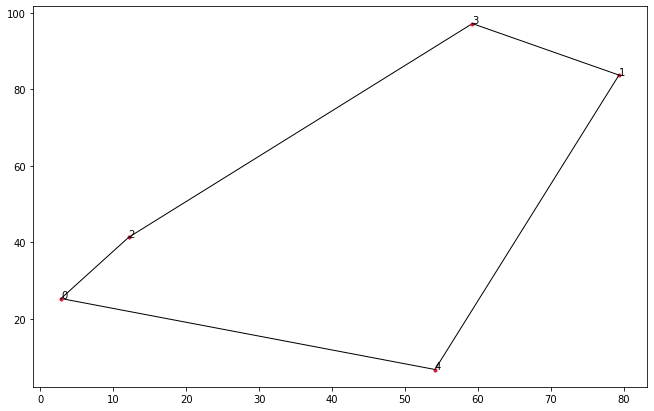

In [ ]:
cds = genera_ciudades(5)
s0 = [0,2,3,4,1]
rs = recocido_simulado(cds,100,300,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 9999
Solución: [4, 0, 2, 3, 1]
Costo total de la solución final 393.9618897122082
El costo total del recorrido es 393.9618897122082 

n! =  120
Solución por fuerza bruta: (1, 3, 2, 0, 4)
Costo del camino calculado por fuerza bruta: 393.9618897122082


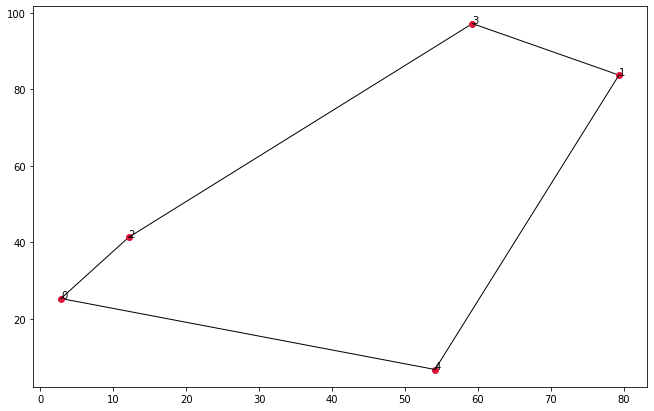

In [ ]:
s0 = [0,2,3,4,1]
rs = recocido_simulado(cds,10000,300,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 99
Solución: [6, 2, 1, 4, 7, 3, 5, 0]
Costo total de la solución final 352.2731917002584
El costo total del recorrido es 352.2731917002584 

n! =  40320
Solución por fuerza bruta: (4, 1, 2, 5, 6, 0, 7, 3)
Costo del camino calculado por fuerza bruta: 352.2731917002584


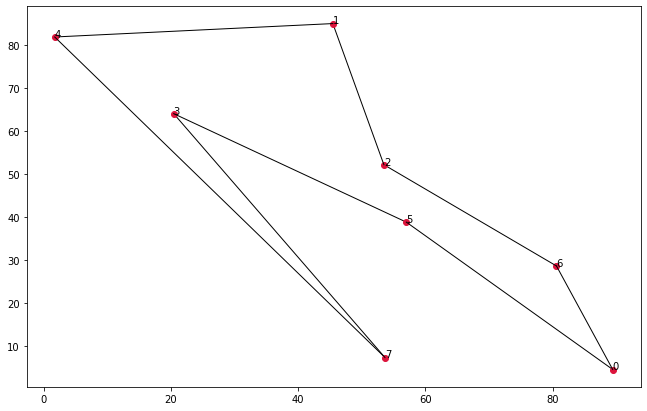

In [ ]:
cds = genera_ciudades(8)
s0 = list(range(8))
rs = recocido_simulado(cds,100,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 99
Solución: [1, 2, 3, 0]
Costo total de la solución final 147.49728847289825
El costo total del recorrido es 147.49728847289825 

n! =  24
Solución por fuerza bruta: (2, 0, 3, 1)
Costo del camino calculado por fuerza bruta: 147.49728847289825


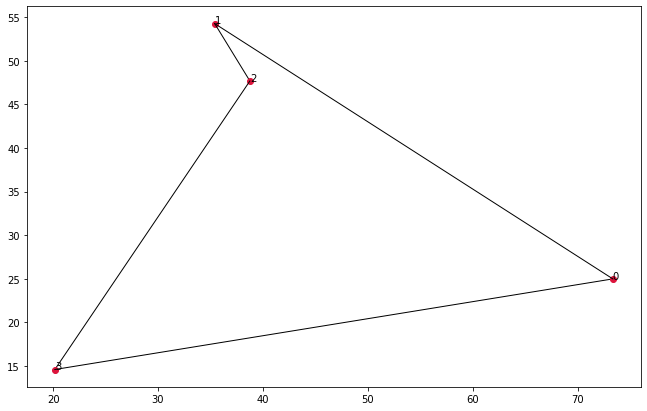

In [ ]:
n = 4
cds = genera_ciudades(n)
s0 = list(range(n))
rs = recocido_simulado(cds,100,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 99
Solución: [4, 0, 1, 5, 6, 3, 2]
Costo total de la solución final 323.9004737850879
El costo total del recorrido es 323.9004737850879 

n! =  5040
Solución por fuerza bruta: (0, 1, 5, 3, 2, 4, 6)
Costo del camino calculado por fuerza bruta: 323.90047378508785


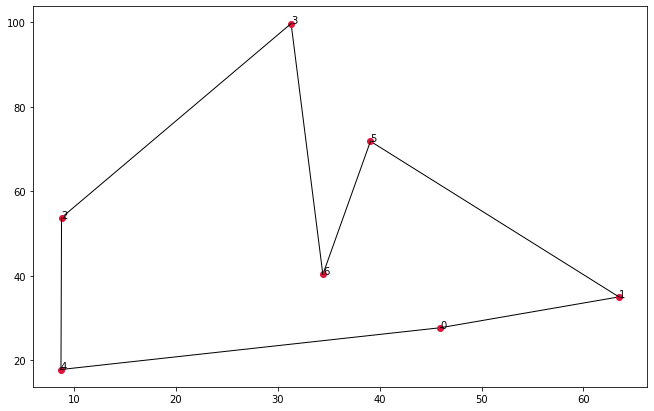

In [ ]:
n = 7
cds = genera_ciudades(n)
s0 = list(range(n))
rs = recocido_simulado(cds,100,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 99
Solución: [6, 1, 0, 3, 4, 2, 5]
Costo total de la solución final 362.94381258119955
El costo total del recorrido es 362.9438125811996 

n! =  5040
Solución por fuerza bruta: (0, 6, 3, 2, 4, 5, 1)
Costo del camino calculado por fuerza bruta: 362.9438125811996


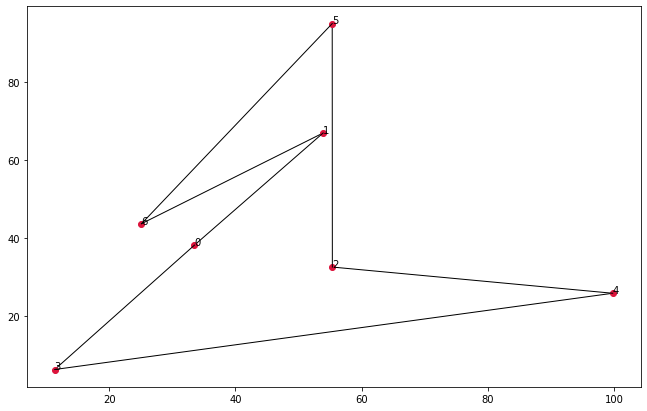

In [ ]:
n = 7
cds = genera_ciudades(n)
s0 = list(range(n))
rs = recocido_simulado(cds,100,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 99
Solución: [3, 2, 4, 5, 1, 9, 6, 0, 7, 8]
Costo total de la solución final 561.1120044162731
El costo total del recorrido es 561.1120044162732 

n! =  3628800
Solución por fuerza bruta: (0, 4, 5, 2, 3, 7, 1, 9, 6, 8)
Costo del camino calculado por fuerza bruta: 561.1120044162732


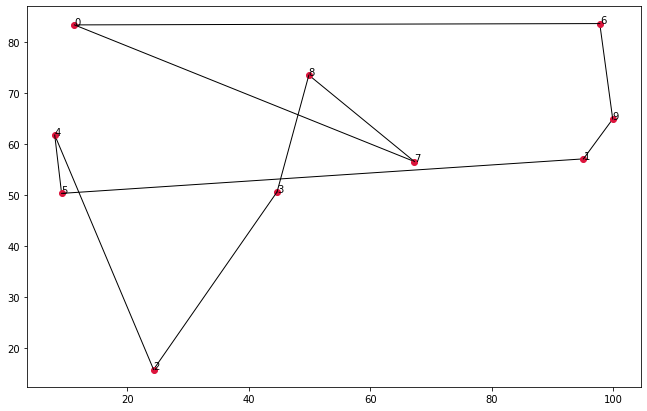

In [ ]:
# CUIDADO; el cálculo de una solución por fuerza bruta puede tardar!
n = 10
cds = genera_ciudades(n)
s0 = list(range(n))
rs = recocido_simulado(cds,100,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))

Numero de iteraciones: 19
Solución: [3, 0, 5, 4, 1, 2]
Costo total de la solución final 283.6164815684236
El costo total del recorrido es 283.6164815684236 

n! =  720
Solución por fuerza bruta: (0, 1, 5, 2, 3, 4)
Costo del camino calculado por fuerza bruta: 283.6164815684236


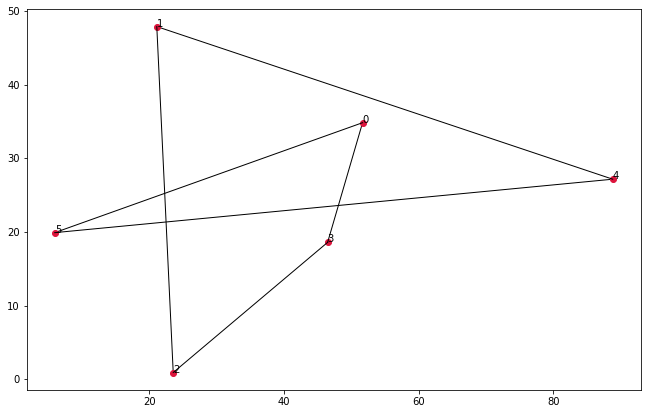

In [ ]:
n = 6
cds = genera_ciudades(n)
s0 = list(range(n))
rs = recocido_simulado(cds,20,100,s0)
f = np.asarray(fuerza_bruta(cds))
print('Costo del camino calculado por fuerza bruta:',CTa(f,cds))